### Perform EDA and build a model to classify fashion accessories
- Perform data cleaning
- Check Whether the classes are balanced or not
- Normalize the images
- Perform data preprocessing
- Train the model using several classification models and find the best model suitable for the problem
- Use hyperparameter tuning to find best parameters for the algorithm
- Evaluate the model using various classification evaluation metrics

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
data = pd.read_csv('fashion-mnist_train.csv')

In [7]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
print(data.label.unique())

[2 9 6 0 3 4 5 8 7 1]


<AxesSubplot:xlabel='label', ylabel='count'>

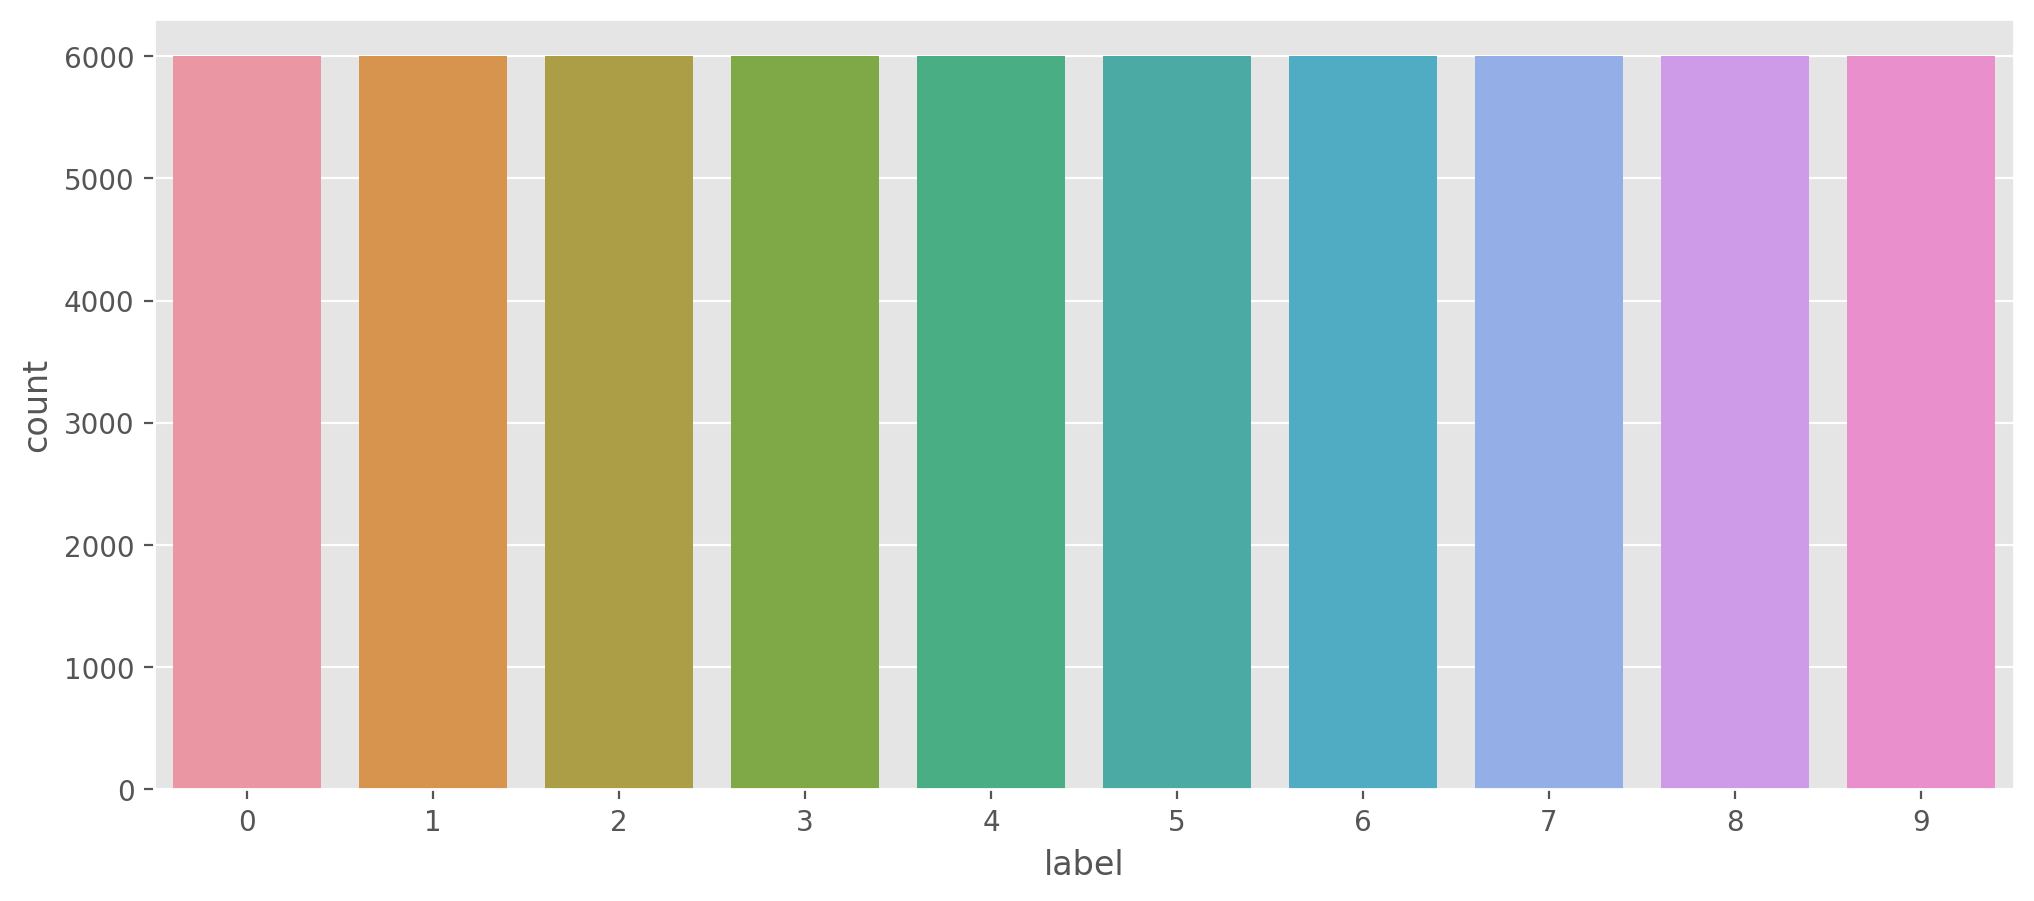

In [10]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('label', data= data)

In [11]:
X = data.drop(['label'], axis = 1).values
Y = data[['label']].values

print('Data Shape   : ', X.shape)
print('Labels Shape : ', Y.shape)

Data Shape   :  (60000, 784)
Labels Shape :  (60000, 1)


(-0.5, 27.5, 27.5, -0.5)

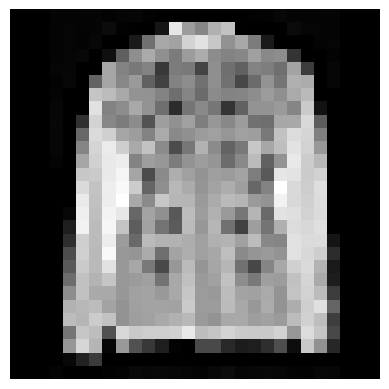

In [17]:
plt.imshow(X[5].reshape(28,28), cmap = 'gray')
plt.axis('off')

In [18]:
np.set_printoptions(linewidth = 200)
print(X[1].reshape(28,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0  81  21   0   1   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0  14 200  49   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   1   1   1   0   1   0   0   0 162 184 165  20   0   1   1   3   4   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   2   0   2   0 120 183 154 20

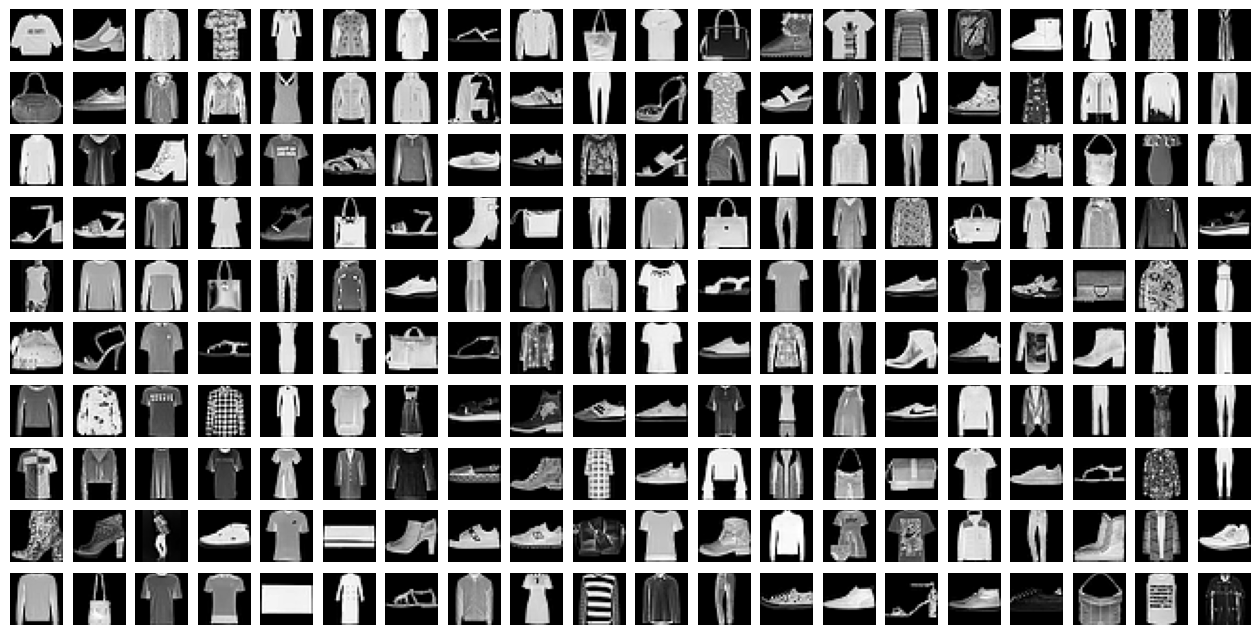

In [19]:
plt.figure(figsize = (16,8))
for i in range(200):
    plt.subplot(10,20,i+1)
    plt.imshow(X[i].reshape(28,28), cmap = 'gray')
    plt.axis('off')

In [20]:
X = X / 255

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [22]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (42000, 784)
Training Labels Shape :  (42000, 1)
Testing Data Shape    :  (18000, 784)
Testing Labels Shape  :  (18000, 1)


## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth = 15)
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [25]:
from sklearn.metrics import accuracy_score
pred_train = dt_classifier.predict(x_train)
pred_test  = dt_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9503809523809523
Testing Set Accuracy  :  0.8016111111111112


## Bagging (random forest)

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [27]:
pred_train = rf_classifier.predict(x_train)
pred_test  = rf_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.8893333333333333
Testing Set Accuracy  :  0.8473333333333334


## boosting (xgboost)

In [28]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier(n_estimators = 50, max_depth = 6)
xg_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [29]:
pred_train = xg_classifier.predict(x_train)
pred_test  = xg_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9908571428571429
Testing Set Accuracy  :  0.8891666666666667


## Light GBM

In [30]:
from lightgbm import LGBMClassifier
lg_classifier = LGBMClassifier(n_estimators = 50)
lg_classifier.fit(x_train,y_train)

LGBMClassifier(n_estimators=50)

In [31]:
pred_train = lg_classifier.predict(x_train)
pred_test  = lg_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9719523809523809
Testing Set Accuracy  :  0.8876666666666667


## Ada Boost

In [32]:
estimator = DecisionTreeClassifier(max_depth = 8, max_features = 500)

from sklearn.ensemble import AdaBoostClassifier
ad_classifier = AdaBoostClassifier(estimator, n_estimators = 50)
ad_classifier.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                         max_features=500))

In [33]:
pred_train = ad_classifier.predict(x_train)
pred_test  = ad_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.8794047619047619
Testing Set Accuracy  :  0.7837222222222222


# hyperparameter tuning

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [35]:
search_params = {
    'n_estimators' : [10, 20, 30, 40, 50],
    'max_depth'    : [3, 4, 6, 8, 10],
    'max_features' : [4, 5, 6]
}

In [36]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator = classifier,
                                       param_distributions = search_params,
                                       scoring = ['accuracy'],
                                       cv = 5,
                                       refit = 'accuracy',
                                       n_iter = 15,
                                       verbose = 3)

randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END max_depth=6, max_features=4, n_estimators=20; accuracy: (test=0.783) total time=   0.7s
[CV 2/5] END max_depth=6, max_features=4, n_estimators=20; accuracy: (test=0.785) total time=   0.7s
[CV 3/5] END max_depth=6, max_features=4, n_estimators=20; accuracy: (test=0.777) total time=   0.7s
[CV 4/5] END max_depth=6, max_features=4, n_estimators=20; accuracy: (test=0.784) total time=   0.7s
[CV 5/5] END max_depth=6, max_features=4, n_estimators=20; accuracy: (test=0.778) total time=   0.7s
[CV 1/5] END max_depth=4, max_features=5, n_estimators=40; accuracy: (test=0.745) total time=   1.1s
[CV 2/5] END max_depth=4, max_features=5, n_estimators=40; accuracy: (test=0.730) total time=   1.1s
[CV 3/5] END max_depth=4, max_features=5, n_estimators=40; accuracy: (test=0.736) total time=   1.1s
[CV 4/5] END max_depth=4, max_features=5, n_estimators=40; accuracy: (test=0.741) total time=   1.1s
[CV 5/5] END max_depth=4, max_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'max_depth': [3, 4, 6, 8, 10],
                                        'max_features': [4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   refit='accuracy', scoring=['accuracy'], verbose=3)

In [37]:
randomized_search.best_params_

{'n_estimators': 30, 'max_features': 5, 'max_depth': 10}

In [38]:
randomized_search.best_score_

0.8286428571428571

In [39]:
best_model = randomized_search.best_estimator_
best_model

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=30)